<a href="https://colab.research.google.com/github/szm7/AML/blob/main/Simple_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv("/content/computers.csv")

In [3]:
data.head()

,Units,Minutes
0,1,23
1,2,29
2,3,49
3,4,64
4,4,74


In [4]:
data.shape

(14, 2)

In [5]:
mean = data['Minutes'].mean()
mean

97.21428571428571

Text(0, 0.5, 'Minutes')

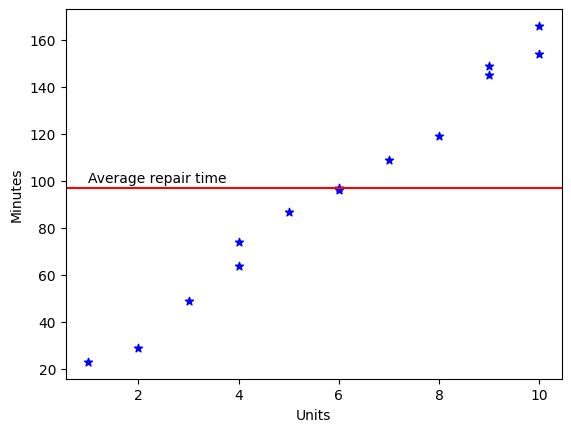

In [6]:
plt.scatter(data['Units'],data['Minutes'],color='blue',marker = '*')
plt.axhline(y=mean,color='red')
plt.annotate("Average repair time",xy=(1,mean+2.5))
plt.xlabel("Units")
plt.ylabel("Minutes")

In [7]:
model1 = data['Minutes'].mean()
model2 = 10+12*data['Units']
model3 = 6+18*data['Units']
print(model1)
print(model2)
print(model3)

97.21428571428571
0      22
1      34
2      46
3      58
4      58
5      70
6      82
7      82
8      94
9     106
10    118
11    118
12    130
13    130
Name: Units, dtype: int64
0      24
1      42
2      60
3      78
4      78
5      96
6     114
7     114
8     132
9     150
10    168
11    168
12    186
13    186
Name: Units, dtype: int64


In [8]:
data['min_model1'] = model1
data['min_model2'] = model2
data['min_model3'] = model3
data.head()

,Units,Minutes,min_model1,min_model2,min_model3
0,1,23,97.214286,22,24
1,2,29,97.214286,34,42
2,3,49,97.214286,46,60
3,4,64,97.214286,58,78
4,4,74,97.214286,58,78


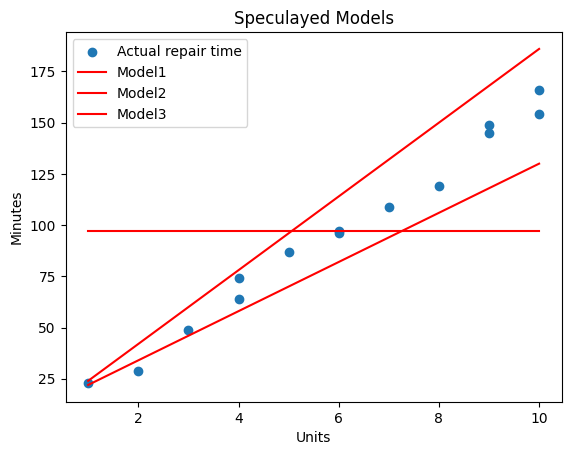

In [9]:
fig, ax =plt.subplots()
ax.scatter(x='Units' , y='Minutes',data = data,label = 'Actual repair time')
ax.plot(data['Units'],data['min_model1'],color='red',label = 'Model1')
ax.plot(data['Units'],data['min_model2'],color='red',label = 'Model2')
ax.plot(data['Units'],data['min_model3'],color='red',label = 'Model3')
ax.set_ylabel('Minutes')
ax.set_xlabel('Units')
ax.set_title("Speculayed Models")
ax.legend()

In [10]:
model1_obs=pd.DataFrame({'Units':data['Units'],
                         'Actual Time':data['Minutes'],
                         'Predicted Time':data['min_model1'],
                         'Error':(data.min_model1 - data.Minutes)
                         })
model1_obs

,Units,Actual Time,Predicted Time,Error
0,1,23,97.214286,74.214286
1,2,29,97.214286,68.214286
2,3,49,97.214286,48.214286
3,4,64,97.214286,33.214286
4,4,74,97.214286,23.214286
5,5,87,97.214286,10.214286
6,6,96,97.214286,1.214286
7,6,97,97.214286,0.214286
8,7,109,97.214286,-11.785714
9,8,119,97.214286,-21.785714


In [11]:
sum(model1_obs ['Error']**2)

27768.357142857145

In [12]:
model2_obs=pd.DataFrame({'Units':data['Units'],
                         'Actual Time':data['Minutes'],
                         'Predicted Time':data['min_model2'],
                         'Error':(data.min_model2 - data.Minutes)
                         })
model2_obs

,Units,Actual Time,Predicted Time,Error
0,1,23,22,-1
1,2,29,34,5
2,3,49,46,-3
3,4,64,58,-6
4,4,74,58,-16
5,5,87,70,-17
6,6,96,82,-14
7,6,97,82,-15
8,7,109,94,-15
9,8,119,106,-13


In [13]:
x = data.Units
y = data.Minutes

xy=x*y
n=len(data)

xmean=data.Units.mean()
ymean=data.Minutes.mean()

numerator=xy.sum()-n*xmean*ymean
denominator=(x**2).sum()-n*(xmean**2)

m=numerator/denominator
c=ymean - (m*xmean)
print('intercept-c:',c,'coefficient-m:',m)

intercept-c: 4.161654135338296 coefficient-m: 15.508771929824569


In [14]:
min_best_model = c+m*data.Units
data['min_best_model']=min_best_model
data[['Units','Minutes','min_best_model']]

,Units,Minutes,min_best_model
0,1,23,19.670426
1,2,29,35.179198
2,3,49,50.687970
3,4,64,66.196742
4,4,74,66.196742
5,5,87,81.705514
6,6,96,97.214286
7,6,97,97.214286
8,7,109,112.723058
9,8,119,128.231830


Text(0.5, 1.0, 'Best Fit Model')

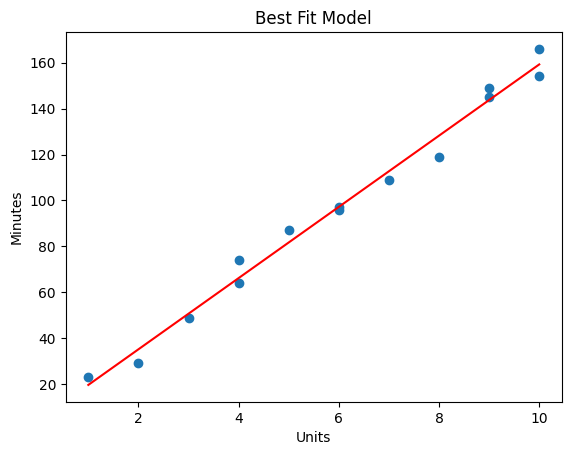

In [15]:
fig,ax=plt.subplots()

ax.scatter(x='Units',y='Minutes',data=data)

ax.plot(data.Units,data.min_best_model,color='red')

ax.set_ylabel('Minutes')
ax.set_xlabel('Units')
ax.set_title('Best Fit Model')

In [16]:
best_fit=pd.DataFrame({'Units':data['Units'],
                         'Actual Time':data['Minutes'],
                         'Predicted Time':data['min_best_model'],
                         'Error':(data.min_best_model - data.Minutes)
                         })
best_fit

,Units,Actual Time,Predicted Time,Error
0,1,23,19.670426,-3.329574
1,2,29,35.179198,6.179198
2,3,49,50.687970,1.687970
3,4,64,66.196742,2.196742
4,4,74,66.196742,-7.803258
5,5,87,81.705514,-5.294486
6,6,96,97.214286,1.214286
7,6,97,97.214286,0.214286
8,7,109,112.723058,3.723058
9,8,119,128.231830,9.231830


In [17]:
sum(best_fit.Error**2)

348.848370927318

In [18]:
x= data[['Units']]

In [19]:
y= data[['Minutes']]

In [20]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [21]:
model.fit(x,y)

LinearRegression()

In [22]:
print("Intercept:",model.intercept_)
print("Co-Efficient:",model.coef_)

Intercept: [4.16165414]
Co-Efficient: [[15.50877193]]


In [23]:
SST = sum((data.Minutes - data.Minutes.mean())**2)
SST

27768.357142857145

In [25]:
SSE = sum(best_fit.Error**2)
SSE

348.848370927318

In [27]:
SSR = SST - SSE
SSR

27419.508771929828

In [28]:
RSQ=SSR/SST
RSQ

0.9874371980620736

In [29]:
RSQ1=model.score(data[['Units']],y)
RSQ1

0.9874371980620736